In [5]:
#Importar las librerías

import pandas as pd
import numpy as np
from collections import Counter
from sklearn import feature_extraction, tree, model_selection, metrics
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from yellowbrick.features import Rank2D

In [6]:
## Cargar el dataset proporcionado
df = pd.read_csv('dataset_pishing.csv')
# df.drop(['host', 'subclass'], axis=1, inplace=True)
# print(df.shape)
# df.sample(n=5).head() # print a random sample of the DataFrame

print(len(df[df['status'] == 'legitimate']))
print(len(df[df['status'] == 'phishing']))
df.head(1000)



5715
5715


,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://secureupdate.appleld.com.duilawyeryork...,1,0,1,0,0,0,0,0,1,...,1,1,0,25,3993,5707171,0,1,0,phishing
996,http://swiftcodes.me/city/kenya/nairobi/bic-sw...,0,0,0,0,0,0,0,0,0,...,1,0,0,300,1891,3513635,0,0,0,legitimate
997,https://10sosh.ru/bin/Notificaciones_Banreservas/,0,0,0,0,0,0,0,0,0,...,1,1,0,308,-2,0,0,1,0,phishing
998,https://ayumilove.wordpress.com/2009/08/09/rdb...,0,0,0,0,0,0,0,0,0,...,1,0,0,586,7448,3945616,0,0,8,legitimate


## Si esta balanceada. Se puede ver que existe la misma cantidad de status = 'legitimate' y de status = 'phishing'.


In [8]:
from urllib.parse import urlsplit

df['f1'] = df['url'].apply(lambda x: len(x))
df['f2'] = df['url'].apply(lambda x: urlsplit(x).hostname)
df['f4'] = df['url'].apply(lambda x: x.count('.'))
df['f5'] = df['url'].apply(lambda x: x.count('-'))
df['f6'] = df['url'].apply(lambda x: x.count('@'))
df['f7'] = df['url'].apply(lambda x: x.count('?'))
df['f8'] = df['url'].apply(lambda x: x.count('&'))
df['f9'] = df['url'].apply(lambda x: x.count('|'))
df['f10'] = df['url'].apply(lambda x: x.count('='))
df['f11'] = df['url'].apply(lambda x: x.count('_'))
df['f12'] = df['url'].apply(lambda x: x.count(' ̃'))
df['f13'] = df['url'].apply(lambda x: x.count('%'))
df['f14'] = df['url'].apply(lambda x: x.count('/'))
df['f15'] = df['url'].apply(lambda x: x.count('*'))
df['f16'] = df['url'].apply(lambda x: x.count(':'))
df['f17'] = df['url'].apply(lambda x: x.count(','))
df['f18'] = df['url'].apply(lambda x: x.count(';'))
df['f19'] = df['url'].apply(lambda x: x.count('$'))
df['f20'] = df['url'].apply(lambda x: x.count(' '))

df['f25'] = df['url'].apply(lambda x: 1 if x.startswith('https') else 0)

def countNumbers(string):
    return sum(c.isdigit() for c in string)
df['f26'] = df['url'].apply(lambda x: countNumbers(x)/len(x))
df['27'] = df['url'].apply(lambda x: countNumbers(urlsplit(x).hostname)/len(urlsplit(x).hostname))


df['status'] = df['status'].apply(lambda x: 1 if x == 'phishing' else 2)
df

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,f14,f15,f16,f17,f18,f19,f20,f25,f26,27
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,3,0,1,0,0,0,0,0,0.000000,0.000000
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,5,0,1,0,0,0,0,0,0.220779,0.000000
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,5,0,1,0,0,0,0,1,0.150794,0.000000
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,2,0,1,0,0,0,0,0,0.000000,0.000000
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,5,0,1,0,0,0,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,0,1,0,0,0,0,0,0,0,...,4,0,1,0,0,0,0,0,0.000000,0.000000
11426,http://www.budgetbots.com/server.php/Server%20...,0,1,1,0,0,0,0,1,0,...,5,0,1,0,0,0,0,0,0.023810,0.000000
11427,https://www.facebook.com/Interactive-Televisio...,1,1,0,0,0,0,0,0,0,...,5,0,1,0,0,0,0,1,0.142857,0.000000
11428,http://www.mypublicdomainpictures.com/,0,1,0,0,0,0,0,0,0,...,3,0,1,0,0,0,0,0,0.000000,0.000000


In [9]:
df = df.drop(['domain_registration_length', 'sfh', 'submit_email', 'ratio_extErrors', 'ratio_intErrors','ratio_extRedirection', 'ratio_intRedirection', 'ratio_nullHyperlinks', 'nb_redirection', 'f9', 'f12', ], axis=1)
df = df.drop_duplicates()

In [10]:
from sklearn.model_selection import train_test_split

target = df['status']
df_final = df.drop(['status', 'f2', 'url'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_final, target, test_size= 0.45)
x_val, x_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.3/(0.3 + 0.15)) 


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(x_val)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("F1:",metrics.f1_score(y_val, y_pred))


Accuracy: 0.9089848308051341
F1: 0.9073634204275534


In [12]:
print('Confusion Matrix\n', metrics.confusion_matrix(y_val, y_pred))

Confusion Matrix
 [[764 101]
 [ 55 794]]


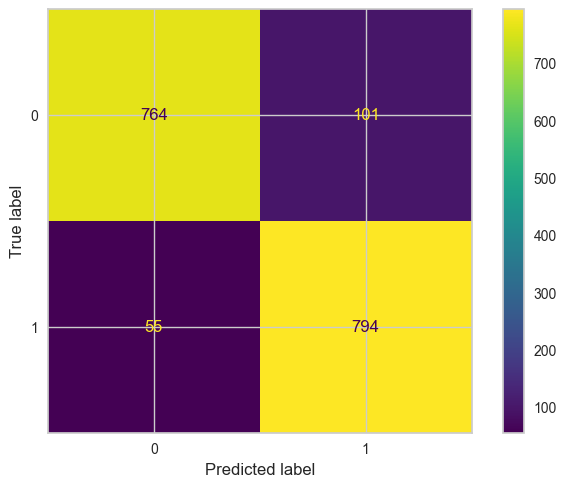

In [13]:
labels = np.unique(y_val)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_val, y_pred, labels=labels))
cm_display.plot()
plt.show()

In [14]:
print(metrics.classification_report(y_val, y_pred, target_names=['legit', 'pishing']))

              precision    recall  f1-score   support

       legit       0.93      0.88      0.91       865
     pishing       0.89      0.94      0.91       849

    accuracy                           0.91      1714
   macro avg       0.91      0.91      0.91      1714
weighted avg       0.91      0.91      0.91      1714



In [15]:
y_pred = clf.predict(x_test)

In [16]:
print('Confusion Matrix\n', metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix
 [[1497  196]
 [ 131 1606]]


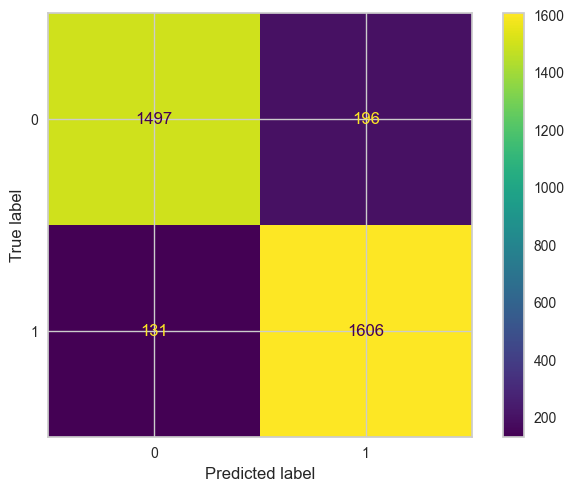

In [17]:
labels = np.unique(y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=labels))
cm_display.plot()
plt.show()

In [18]:
print(metrics.classification_report(y_test, y_pred, target_names=['legit', 'pishing']))

              precision    recall  f1-score   support

       legit       0.92      0.88      0.90      1693
     pishing       0.89      0.92      0.91      1737

    accuracy                           0.90      3430
   macro avg       0.91      0.90      0.90      3430
weighted avg       0.91      0.90      0.90      3430



In [28]:
from sklearn.ensemble import RandomForestClassifier
model_forest_classifier = RandomForestClassifier(max_depth=4, n_estimators=100)
model_forest_classifier.fit(X_train,y_train)
y_pred = model_forest_classifier.predict(x_val)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))
print("Recall:",metrics.recall_score(y_val, y_pred))
print("f1", metrics.f1_score(y_val, y_pred))

Accuracy: 0.9393232205367561
Recall: 0.9329479768786128
f1 0.9394644935972061


Explique qué significa el valor de las métricas de precision, recall y f1-score:

# Recall: es la proporcion de los positivos que fueron identificados de forma correcta. En este caso el 88% de los sitios legit fueron identificados como tal correctamentem y 92% de los sitios de phishing fueron identificados correctamente.. 
# Precision: es la proporcion de los casos identificados como positivos. Se obtuvo un resultado de 92% para legit y 89% para phishing, lo que indica una leve mejoria en la prediccion para legit, sin embargo ambas predicciones fueron muy buenas.
# F1-Score: es una metrica que combina recall y precision, realizando un promedio. Se obtuvo un resultado de 94%, lo que indica que el modelo en terminos generales predijo de manera muy buena los resultados solicitados.

In [20]:
print('Confusion Matrix\n', metrics.confusion_matrix(y_val, y_pred))

Confusion Matrix
 [[806  59]
 [ 43 806]]


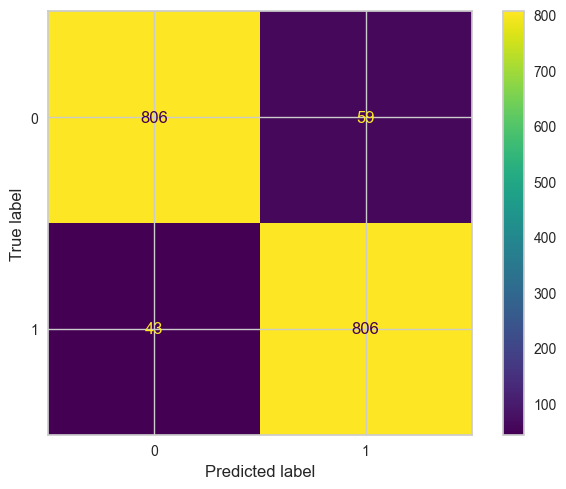

In [21]:
labels = np.unique(y_val)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_val, y_pred, labels=labels))
cm_display.plot()
plt.show()

In [22]:
print(metrics.classification_report(y_val, y_pred, target_names=['legit', 'pishing']))

              precision    recall  f1-score   support

       legit       0.95      0.93      0.94       865
     pishing       0.93      0.95      0.94       849

    accuracy                           0.94      1714
   macro avg       0.94      0.94      0.94      1714
weighted avg       0.94      0.94      0.94      1714



In [23]:
y_pred = model_forest_classifier.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9332361516034985


In [24]:
print('Confusion Matrix\n', metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix
 [[1567  126]
 [ 103 1634]]


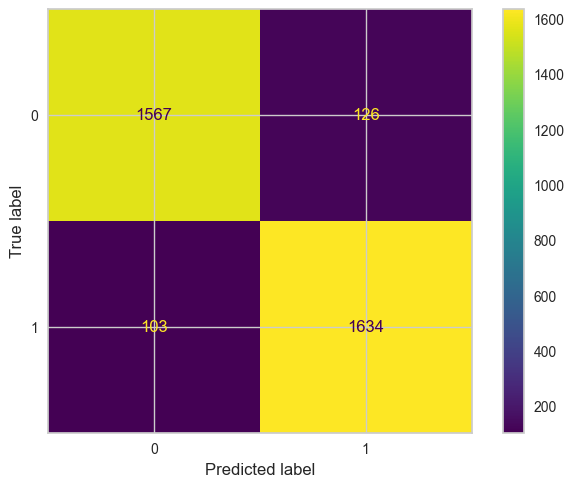

In [25]:
labels = np.unique(y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=labels))
cm_display.plot()
plt.show()

In [26]:
print(metrics.classification_report(y_test, y_pred, target_names=['legit', 'pishing']))

              precision    recall  f1-score   support

       legit       0.94      0.93      0.93      1693
     pishing       0.93      0.94      0.93      1737

    accuracy                           0.93      3430
   macro avg       0.93      0.93      0.93      3430
weighted avg       0.93      0.93      0.93      3430



## 1. Ademas de alimentar el modelo de forma incorrecta, este afectara al sitio sin este percatarse de lo que ocurre ya que sera un sitio clasificado de forma incorrecta. Esto podria hacer que el usuario ingrese a un sitio que piense que es legitimo pero que en realidad es fuente de phishing, y ser hackeado.

## 2. Los usuarios que utilizen este modelo se veran afectados ya que tendran la posibilidad de entrar a un sitio de pishing. Igualmente, el usuario pensara que es un sitio que no puede causar daños, pero en realidad si.

## 3. Interesa mas el accuracy ya que los casos positivos acertados son aquellos que nos interesa mas debido a que nos dice si nuestro modelo esta clasificando de forma correcta todos los casos, y en el tipo de problema de pishing nos interesa exactamente eso debido a que da mas seguridad al usuario a que no entre a estas paginas.

## 4. Random Forest Classifier es el mejor modelo porque como podemos observar nos dio un resultado de accuracy mas alto. Random Forest dio como F1 Score 0.94 y Decision Tree dio 0.89

## 5. Debido a las metricas obtenidas no es necesario de una intervencion humana ya que es bastante confiable respaldada por metricas, ademas es un proceso largo lo cual es mejor ser remplazado por el modelo. Sin embargo, no esta de mas que un humano revise los falsos negativos para re-catalogarlos donde corresponden. Esto es recomendable ya que caer en phishing es lo ultimo que cualquier persona puede desear por la delicadeza de la informacion.